In [ ]:
!pip install yfinance


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:
ticker = "RELIANCE.NS"
start_date = "2023-12-01"
end_date = "2025-12-31"

df = yf.download(ticker, start=start_date, end=end_date)
df = df[['Close']]
df.dropna(inplace=True)

df.head()


/tmp/ipython-input-2881854478.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,RELIANCE.NS
Date,
2023-12-01,1188.354492
2023-12-04,1201.209351
2023-12-05,1209.919922
2023-12-06,1221.509155
2023-12-07,1219.498901


In [ ]:
def SMA(series, window):
    return series.rolling(window=window).mean()


In [ ]:
def EMA(series, window):
    return series.ewm(span=window, adjust=False).mean()


In [ ]:
def MACD(series):
    ema12 = EMA(series, 12)
    ema26 = EMA(series, 26)
    macd = ema12 - ema26
    signal = EMA(macd, 9)
    return macd, signal


In [ ]:
def RSI(series, window=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


In [ ]:
def stochastic_oscillator(series, window=14):
    low = series.rolling(window).min()
    high = series.rolling(window).max()

    percent_k = (series - low) / (high - low) * 100
    percent_d = percent_k.rolling(3).mean()
    return percent_k, percent_d


In [ ]:
def bollinger_bands(series, window=20):
    sma = SMA(series, window)
    std = series.rolling(window).std()

    upper = sma + 2 * std
    lower = sma - 2 * std
    return sma, upper, lower


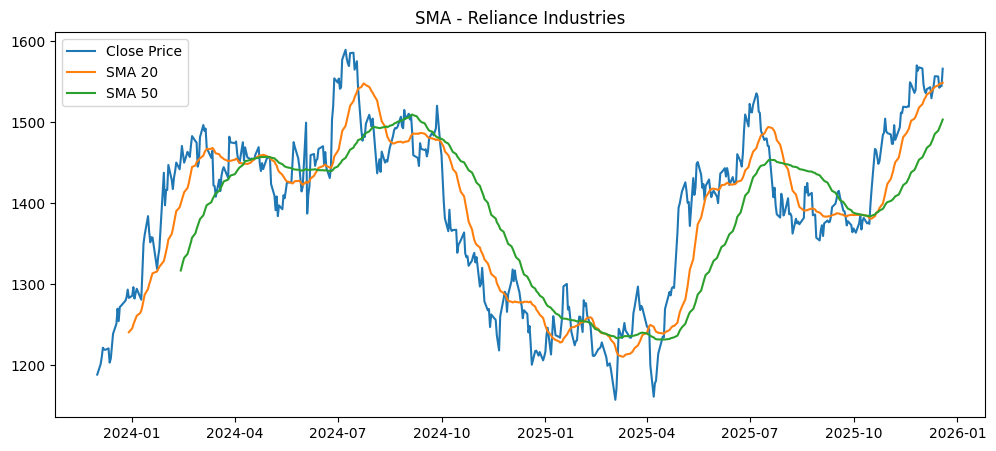

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Close Price')
plt.plot(SMA(df['Close'], 20), label='SMA 20')
plt.plot(SMA(df['Close'], 50), label='SMA 50')
plt.title('SMA - Reliance Industries')
plt.legend()
plt.show()


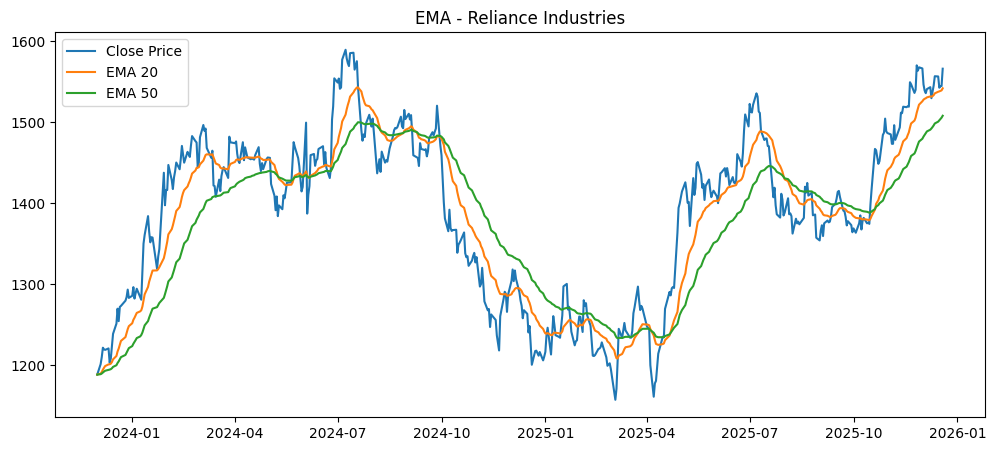

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Close Price')
plt.plot(EMA(df['Close'], 20), label='EMA 20')
plt.plot(EMA(df['Close'], 50), label='EMA 50')
plt.title('EMA - Reliance Industries')
plt.legend()
plt.show()


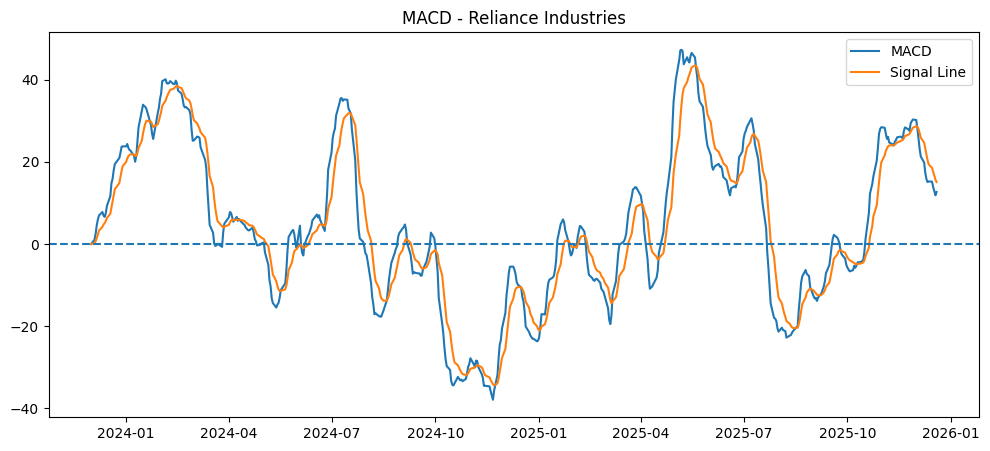

In [ ]:
macd, signal = MACD(df['Close'])

plt.figure(figsize=(12,5))
plt.plot(macd, label='MACD')
plt.plot(signal, label='Signal Line')
plt.axhline(0, linestyle='--')
plt.title('MACD - Reliance Industries')
plt.legend()
plt.show()


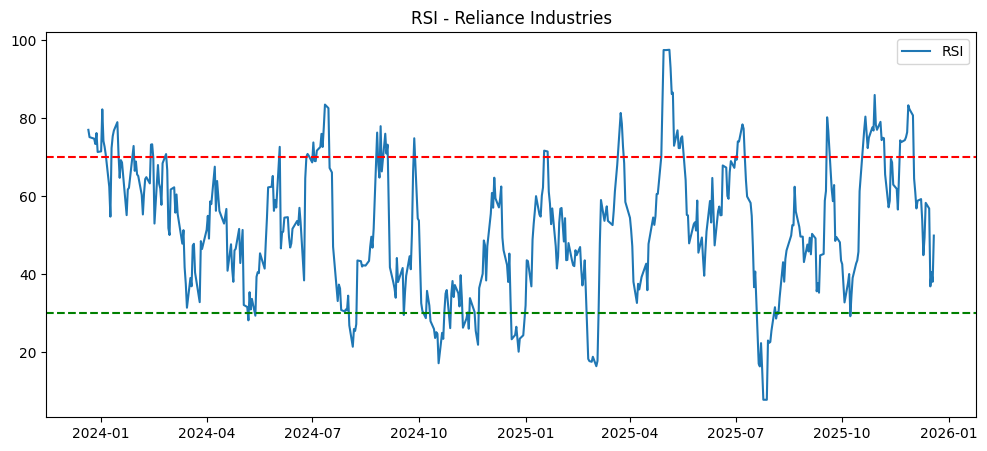

In [ ]:
rsi = RSI(df['Close'])

plt.figure(figsize=(12,5))
plt.plot(rsi, label='RSI')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title('RSI - Reliance Industries')
plt.legend()
plt.show()


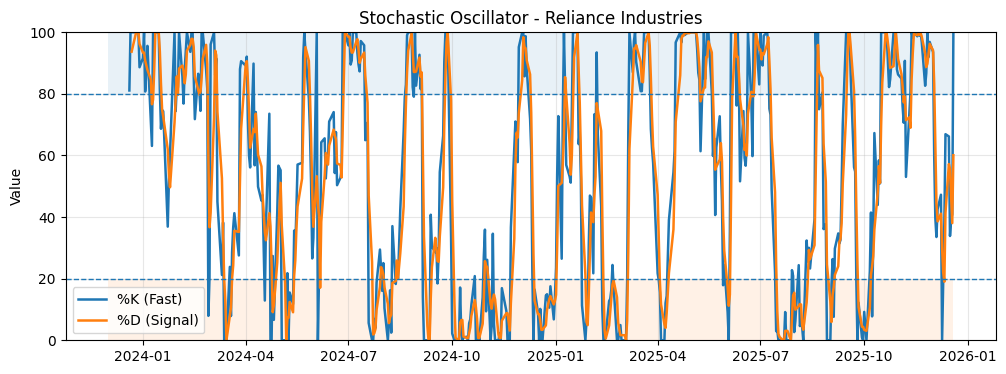

In [ ]:
k, d = stochastic_oscillator(df['Close'])

plt.figure(figsize=(12,4))

plt.plot(k, label='%K (Fast)', linewidth=1.8)
plt.plot(d, label='%D (Signal)', linewidth=1.8)

plt.axhline(80, linestyle='--', linewidth=1)
plt.axhline(20, linestyle='--', linewidth=1)

plt.fill_between(k.index, 80, 100, alpha=0.1)
plt.fill_between(k.index, 0, 20, alpha=0.1)

plt.ylim(0, 100)
plt.title('Stochastic Oscillator - Reliance Industries')
plt.ylabel('Value')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


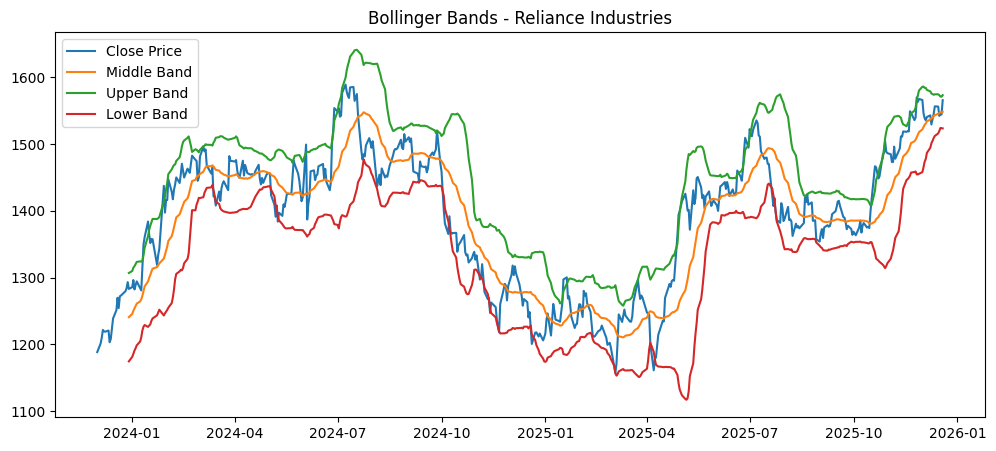

In [ ]:
mid, upper, lower = bollinger_bands(df['Close'])

plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Close Price')
plt.plot(mid, label='Middle Band')
plt.plot(upper, label='Upper Band')
plt.plot(lower, label='Lower Band')
plt.title('Bollinger Bands - Reliance Industries')
plt.legend()
plt.show()


In [31]:
# TARGET DATE
target_date = "2025-04-29"

# Extract values
close_price = df.loc[target_date, "Close"].item()
sma14 = df.loc[target_date, "SMA14"].item()
ema14 = df.loc[target_date, "EMA14"].item()
rsi14 = df.loc[target_date, "RSI14"].item()

macd_val = df.loc[target_date, "MACD"].item()
signal_val = df.loc[target_date, "Signal"].item()

k_val = df.loc[target_date, "%K"].item()
d_val = df.loc[target_date, "%D"].item()

bb_middle = df.loc[target_date, "BB_Middle"].item()
bb_upper  = df.loc[target_date, "BB_Upper"].item()
bb_lower  = df.loc[target_date, "BB_Lower"].item()

print(f"Ticker: RELIANCE.NS — Date: {target_date}")
print("Close Price:", close_price)

print("\n1) SMA (14):", round(sma14,2))
print("Significance: Trend average over last 14 days.")

print("\n2) EMA (14):", round(ema14,2))
print("Significance: More weight to recent prices.")
if close_price > ema14:
    print("Signal: Bullish (price > EMA)")
else:
    print("Signal: Bearish (price < EMA)")

print("\n3) MACD:", round(macd_val,2), "Signal:", round(signal_val,2))
if macd_val > signal_val:
    print("MACD Signal: Bullish momentum")
else:
    print("MACD Signal: Bearish momentum")

print("\n4) RSI (14):", round(rsi14,2))
if rsi14 > 70:
    print("RSI Signal: Overbought")
elif rsi14 < 30:
    print("RSI Signal: Oversold")
else:
    print("RSI Signal: Neutral")

print("\n5) Stochastic %K:", round(k_val,2), "%D:", round(d_val,2))
if k_val > d_val:
    print("Stochastic Signal: %K above %D (Bullish)")
else:
    print("Stochastic Signal: %D above %K (Bearish)")

print("\n6) Bollinger Bands")
print("Middle:", round(bb_middle,2), "Upper:", round(bb_upper,2), "Lower:", round(bb_lower,2))
if close_price > bb_upper:
    print("Bollinger Signal: Price above upper band — possible overbought")
elif close_price < bb_lower:
    print("Bollinger Signal: Price below lower band — possible oversold")
else:
    print("Bollinger Signal: Price within bands (normal volatility)")

Ticker: RELIANCE.NS — Date: 2025-04-29
Close Price: 1394.1319580078125

1) SMA (14): nan
Significance: Trend average over last 14 days.

2) EMA (14): nan
Significance: More weight to recent prices.
Signal: Bearish (price < EMA)

3) MACD: 28.62 Signal: 12.88
MACD Signal: Bullish momentum

4) RSI (14): 84.14
RSI Signal: Overbought

5) Stochastic %K: 100.0 %D: 99.71
Stochastic Signal: %K above %D (Bullish)

6) Bollinger Bands
Middle: 1258.66 Upper: 1375.53 Lower: 1141.79
Bollinger Signal: Price above upper band — possible overbought
